In [1]:
# Czym są kolejne df
# df1 - dane początkowe
# df2 - dane df1 bez niepotrzebnych kolumn
# df3 - dane df2 z uproszczonymi adresami (other bądź faktyczny adres, jeśli jest powtarzalny)
# df4 - dane df3 z usuniętymi wartościami skrajnymi
# df5 - dane df4 z usuniętymi polami gdy cena mieszkania z 2 pokojami przewyższa cenę z 3 pokojami
# Co z resztą ilości pokoi? Piętro może robić znaczenie i adres, który się nam zmieni na dzielnicę. Ja bym usunął
# df6 - dane df1 z kolumną prize_per_sq oraz z usuniętymi ekstramalnymi wartościami cenowymi
# df7 - dane df6 z podziałem na dzielnice zamiast adresów

In [2]:
# Wszystkie potrzbne importy w projekcie
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df1 = pd.read_csv("Houses.csv", encoding='windows-1250')
df1.head()

,no,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zabłocie Stanisława Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Południe Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,3,Grunwald,Poznań,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0


In [4]:
df1.shape

(23764, 11)

In [5]:
df2 = df1.drop(["no","latitude", "longitude", "id"], axis='columns')

In [6]:
df2.head(10)

,address,city,floor,price,rooms,sq,year
0,Podgórze Zabłocie Stanisława Klimeckiego,Kraków,2.0,749000.0,3.0,74.05,2021.0
1,Praga-Południe Grochowska,Warszawa,3.0,240548.0,1.0,24.38,2021.0
2,Krowodrza Czarnowiejska,Kraków,2.0,427000.0,2.0,37.00,1970.0
3,Grunwald,Poznań,2.0,1290000.0,5.0,166.00,1935.0
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,996000.0,5.0,105.00,2020.0
5,Nowa Huta Czyżyny ul. Woźniców,Kraków,2.0,414600.0,1.0,34.55,2022.0
6,Podgórze Płaszów Koszykarska,Kraków,0.0,750000.0,4.0,81.40,2021.0
7,Mokotów Pory,Warszawa,10.0,2890000.0,6.0,280.00,2003.0
8,Ursynów Wyżyny,Warszawa,3.0,615000.0,4.0,63.40,1982.0
9,Bemowo,Warszawa,1.0,429000.0,1.0,40.00,1999.0


In [7]:
df2.isnull().sum()

address    0
city       0
floor      0
price      0
rooms      0
sq         0
year       0
dtype: int64

In [8]:
df3 = df2.copy()
df3['price_per_sq'] = df3['price'] / df3['sq']

In [9]:
df3.head()

,address,city,floor,price,rooms,sq,year,price_per_sq
0,Podgórze Zabłocie Stanisława Klimeckiego,Kraków,2.0,749000.0,3.0,74.05,2021.0,10114.787306
1,Praga-Południe Grochowska,Warszawa,3.0,240548.0,1.0,24.38,2021.0,9866.611977
2,Krowodrza Czarnowiejska,Kraków,2.0,427000.0,2.0,37.00,1970.0,11540.540541
3,Grunwald,Poznań,2.0,1290000.0,5.0,166.00,1935.0,7771.084337
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,996000.0,5.0,105.00,2020.0,9485.714286


In [10]:
len(df3.address.unique())

5419

In [11]:
df3.address = df3.address.apply(lambda x: x.strip())

address_stats = df3.groupby('address')['address'].agg('count').sort_values(ascending=False)
address_stats

address
Mokotów                                          426
Wola                                             384
Nowe Miasto Malta ul. Katowicka                  377
Śródmieście                                      352
Białołęka                                        248
                                                ... 
Praga-Północ Nowa Praga Plac Hallera               1
Praga-Północ Nowa Praga Stefana Starzyńskiego      1
Praga-Północ Nowa Praga Strzelecka                 1
Praga-Północ Nowa Praga Wileńska 16                1
Żoliborz Żoliborz Artystyczny                      1
Name: address, Length: 5392, dtype: int64

In [12]:
len(address_stats[address_stats<=10])

5084

In [13]:
address_stats_less_than_10 = address_stats[address_stats<=10]
df3.address = df3.address.apply(lambda x: 'Other' if x in address_stats_less_than_10 else x)

In [14]:
len(df3.address.unique())

309

In [15]:
df3.price_per_sq.describe()

count     23764.000000
mean      10760.979594
std        3861.161601
min           1.000000
25%        8400.000000
50%        9947.958273
75%       12318.157708
max      138636.363636
Name: price_per_sq, dtype: float64

In [16]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('city'):
        m = np.mean(subdf.price_per_sq)
        st = np.std(subdf.price_per_sq)
        reduced_df = subdf[(subdf.price_per_sq>(m-st)) & (subdf.price_per_sq <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df4 = remove_outliers(df3)
df4.shape

(19306, 8)

In [17]:
#df4 jest bez ekstremalnie malych i ekstremalnie duzych cen ( -4k rows :) )

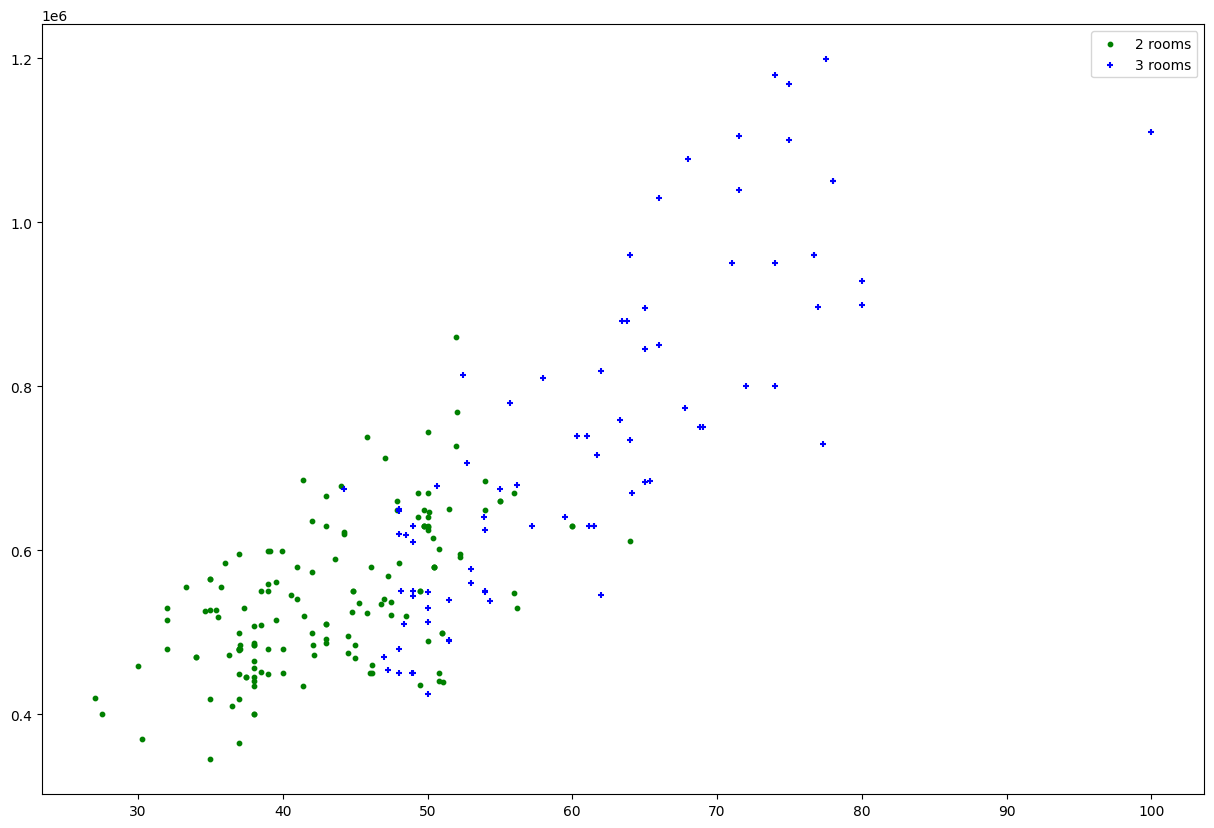

In [18]:
def plot_scatter(df, location, address):
    rooms2 = df[(df.city == location) & (df.rooms == 2) & (df.address == address)]
    rooms3 = df[(df.city == location) & (df.rooms == 3) & (df.address == address)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(rooms2.sq, rooms2.price, color='green', label='2 rooms', s=10)
    plt.scatter(rooms3.sq, rooms3.price, marker='+', color='blue', label='3 rooms', s=20)
    plt.legend()

plot_scatter(df4, 'Warszawa', 'Wola')

In [19]:
# bóg wie co tu sie dzieje generalnie
def remove(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('city'):
        rooms_stats = {}
        for rooms, rooms_df in location_df.groupby('rooms'):
            rooms_stats[rooms] = {
                'mean':np.mean(rooms_df.price_per_sq),
                'std':np.std(rooms_df.price_per_sq),
                'count':rooms_df.shape[0]
            }
        for rooms, rooms_df in location_df.groupby('rooms'):
            stats = rooms_stats.get(rooms-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, rooms_df[rooms_df.price_per_sq<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [20]:
df5 = remove(df4)
df5.shape


(7871, 8)

In [21]:
# ta 5ka strasznie dużo zjada tych danych, ja bym na tą chwilę został przy 4ce
df4.shape

(19306, 8)

In [22]:
# Trzeba przygotować nowy df, bo na początku wywaliliśmy koordynacje
# i uprościliśmy zapis adresów
df6 = df1.drop(["no", "id"], axis='columns')
df6['price_per_sq'] = df6['price'] / df6['sq']
df6 = remove_outliers(df6)

In [23]:
df6.shape

(19306, 10)

In [24]:
def count_addresses_without_neighborhood(df):
    licznik = 0
    for x in df['address']:
        if ("ul." in x) or (any(letter.isdigit() for letter in x)):
            licznik+=1
    return licznik

In [25]:
count_addresses_without_neighborhood(df6)

5511

In [26]:
len(df6.address.unique())

4616

In [27]:
print(f'Krk:{len(df6[df6.city == "Kraków"].address.unique())}')
print(f'WWa:{len(df6[df6.city == "Warszawa"].address.unique())}')
print(f'Pzn:{len(df6[df6.city == "Poznań"].address.unique())}')

Krk:1587
WWa:2504
Pzn:528


In [28]:
df7 =  pd.read_csv("neighborhood_df.csv", encoding="utf-8")

In [29]:
# usunięcie przeoczonych dwóch miejscówek, których nie udało się znaleźć przez API
df7.drop(df7[df7.address == 'Śródmieście ul. Kamienna'].index, inplace=True)
df7.drop(df7[df7.address == 'Śródmieście Brogi'].index, inplace=True)

In [30]:
# Trochę się udało poprawić wyniki :)
# To są unikalne dzielnice dla każdego miasta
print(f'Krk:{len(df7[df7.city == "Kraków"].address.unique())}')
print(f'WWa:{len(df7[df7.city == "Warszawa"].address.unique())}')
print(f'Pzn:{len(df7[df7.city == "Poznań"].address.unique())}')

Krk:17
WWa:18
Pzn:5


In [31]:
print("Krw")
print(df7[(df7.city == "Kraków")].address.unique())
print("Wwa")
print(df7[(df7.city == "Warszawa")].address.unique())
print("Pzn")
print(df7[(df7.city == "Poznań")].address.unique())

Krw
['Podgórze' 'Krowodrza' 'Nowa Huta' 'Stare Miasto' 'Prądnik Biały'
 'Dębniki' 'Zwierzyniec' 'Podgórze Duchackie' 'Grzegórzki' 'Bronowice'
 'Prądnik Czerwony' 'Bieżanów-Prokocim' 'Mistrzejowice'
 'Łagiewniki-Borek Fałęcki' 'Wzgórza Krzesławickie' 'Bieńczyce'
 'Swoszowice']
Wwa
['Praga-Południe' 'Ochota' 'Mokotów' 'Ursynów' 'Bemowo' 'Śródmieście'
 'Wola' 'Białołęka' 'Wilanów' 'Włochy' 'Żoliborz' 'Ursus' 'Bielany'
 'Targówek' 'Praga-Północ' 'Wesoła' 'Rembertów' 'Wawer']
Pzn
['Grunwald' 'Nowe Miasto' 'Stare Miasto' 'Jeżyce' 'Wilda']


In [32]:
print("Kraków\n------")
krakow_stats = df7.loc[df7['city'] == 'Kraków', 'address'].value_counts().sort_values(ascending=False)
krakow_stats

Kraków
------


address
Podgórze                    1062
Nowa Huta                   1055
Prądnik Biały                787
Podgórze Duchackie           655
Dębniki                      637
Grzegórzki                   574
Mistrzejowice                556
Krowodrza                    404
Stare Miasto                 396
Bieżanów-Prokocim            368
Prądnik Czerwony             345
Bronowice                    333
Zwierzyniec                  140
Łagiewniki-Borek Fałęcki     105
Bieńczyce                     82
Wzgórza Krzesławickie         37
Swoszowice                    19
Name: count, dtype: int64

In [33]:
print("Warszawa\n------")
warszawa_stats = df7.loc[df7['city'] == 'Warszawa', 'address'].value_counts().sort_values(ascending=False)
warszawa_stats

Warszawa
------


address
Mokotów           1391
Wola              1158
Praga-Południe     899
Bemowo             751
Białołęka          634
Śródmieście        501
Bielany            480
Ursynów            472
Ochota             418
Targówek           339
Wilanów            303
Ursus              270
Praga-Północ       255
Żoliborz           241
Włochy             205
Wawer              122
Rembertów           42
Wesoła              16
Name: count, dtype: int64

In [34]:
print("Poznań\n------")
poznan_stats = df7.loc[df7['city'] == 'Poznań', 'address'].value_counts().sort_values(ascending=False)
poznan_stats

Poznań
------


address
Nowe Miasto     951
Grunwald        879
Stare Miasto    829
Jeżyce          459
Wilda           133
Name: count, dtype: int64

In [35]:
dummies = pd.get_dummies(df7.address)
dummies.head(3)

,Bemowo,Białołęka,Bielany,Bieńczyce,Bieżanów-Prokocim,Bronowice,Dębniki,Grunwald,Grzegórzki,Jeżyce,...,Wesoła,Wilanów,Wilda,Wola,Wzgórza Krzesławickie,Włochy,Zwierzyniec,Łagiewniki-Borek Fałęcki,Śródmieście,Żoliborz
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
df8 = pd.concat([df7,dummies],axis='columns')
df8.head(4)

,address,city,floor,latitude,longitude,price,rooms,sq,year,price_per_sq,...,Wesoła,Wilanów,Wilda,Wola,Wzgórza Krzesławickie,Włochy,Zwierzyniec,Łagiewniki-Borek Fałęcki,Śródmieście,Żoliborz
0,Podgórze,Kraków,2.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0,10114.787306,...,False,False,False,False,False,False,False,False,False,False
1,Krowodrza,Kraków,2.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0,11540.540541,...,False,False,False,False,False,False,False,False,False,False
2,Nowa Huta,Kraków,2.0,50.046943,19.997153,414600.0,1.0,34.55,2022.0,12000.000000,...,False,False,False,False,False,False,False,False,False,False
3,Podgórze,Kraków,0.0,50.049893,19.990603,750000.0,4.0,81.40,2021.0,9213.759214,...,False,False,False,False,False,False,False,False,False,False


In [54]:
df9 = df8.drop('address',axis='columns')
df9 = df9.drop('city', axis='columns')
df9.head(3)

,floor,latitude,longitude,price,rooms,sq,year,price_per_sq,Bemowo,Białołęka,...,Wesoła,Wilanów,Wilda,Wola,Wzgórza Krzesławickie,Włochy,Zwierzyniec,Łagiewniki-Borek Fałęcki,Śródmieście,Żoliborz
0,2.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0,10114.787306,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0,11540.540541,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,50.046943,19.997153,414600.0,1.0,34.55,2022.0,12000.000000,False,False,...,False,False,False,False,False,False,False,False,False,False


In [104]:
X = df9.drop(['price',"latitude", "longitude", "price_per_sq"], axis='columns')
X_columns = X.columns
X.head()

,floor,rooms,sq,year,Bemowo,Białołęka,Bielany,Bieńczyce,Bieżanów-Prokocim,Bronowice,...,Wesoła,Wilanów,Wilda,Wola,Wzgórza Krzesławickie,Włochy,Zwierzyniec,Łagiewniki-Borek Fałęcki,Śródmieście,Żoliborz
0,2.0,3.0,74.05,2021.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.0,2.0,37.00,1970.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1.0,34.55,2022.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.0,4.0,81.40,2021.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.0,4.0,82.43,2021.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
y = df9.price
y.head()

0    749000.0
1    427000.0
2    414600.0
3    750000.0
4    756707.4
Name: price, dtype: float64

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

In [70]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.875221697630831

In [71]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.87487974, 0.8722308 , 0.86846794, 0.86791923, 0.86570797,
       0.87163459, 0.86472196, 0.87334079, 0.88321309, 0.88040474])

In [72]:
X.head(3)

,floor,rooms,sq,year,Bemowo,Białołęka,Bielany,Bieńczyce,Bieżanów-Prokocim,Bronowice,...,Wesoła,Wilanów,Wilda,Wola,Wzgórza Krzesławickie,Włochy,Zwierzyniec,Łagiewniki-Borek Fałęcki,Śródmieście,Żoliborz
0,2.0,3.0,74.05,2021.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.0,2.0,37.00,1970.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1.0,34.55,2022.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [73]:
weights = {
    col:1 for col in X_train.columns
}

In [74]:
# manupulacja wagami
weights['sq'] = 5
weights

{'floor': 1,
 'rooms': 1,
 'sq': 5,
 'year': 1,
 'Bemowo': 1,
 'Białołęka': 1,
 'Bielany': 1,
 'Bieńczyce': 1,
 'Bieżanów-Prokocim': 1,
 'Bronowice': 1,
 'Dębniki': 1,
 'Grunwald': 1,
 'Grzegórzki': 1,
 'Jeżyce': 1,
 'Krowodrza': 1,
 'Mistrzejowice': 1,
 'Mokotów': 1,
 'Nowa Huta': 1,
 'Nowe Miasto': 1,
 'Ochota': 1,
 'Podgórze': 1,
 'Podgórze Duchackie': 1,
 'Praga-Południe': 1,
 'Praga-Północ': 1,
 'Prądnik Biały': 1,
 'Prądnik Czerwony': 1,
 'Rembertów': 1,
 'Stare Miasto': 1,
 'Swoszowice': 1,
 'Targówek': 1,
 'Ursus': 1,
 'Ursynów': 1,
 'Wawer': 1,
 'Wesoła': 1,
 'Wilanów': 1,
 'Wilda': 1,
 'Wola': 1,
 'Wzgórza Krzesławickie': 1,
 'Włochy': 1,
 'Zwierzyniec': 1,
 'Łagiewniki-Borek Fałęcki': 1,
 'Śródmieście': 1,
 'Żoliborz': 1}

In [98]:
# funkcja do szacowania cen
def predict_price(address, floor, rooms, sq, year, model):
    address_index = np.where(X.columns==address)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = floor
    x[1] = rooms
    x[2] = sq
    x[3] = year
    if address_index >= 0:
        x[address_index] = 1
    return model.predict([x])[0]

In [112]:
# tutaj jest dziwny komunikat, ale ogólnie to sie wykonuje
# cen
predict_price('Podgórze', 2.0, 3.0,	74.05, 2021.0, lr_clf)

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


760925.3981932802

In [100]:
predict_price('Nowa Huta', 2.0, 1.0, 34.55, 2022.0, lr_clf)

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


364223.8510919435

In [89]:
print(X.columns)
np.where(X.columns=="Podgórze")[0][0]

Index(['floor', 'rooms', 'sq', 'year', 'Bemowo', 'Białołęka', 'Bielany',
       'Bieńczyce', 'Bieżanów-Prokocim', 'Bronowice', 'Dębniki', 'Grunwald',
       'Grzegórzki', 'Jeżyce', 'Krowodrza', 'Mistrzejowice', 'Mokotów',
       'Nowa Huta', 'Nowe Miasto', 'Ochota', 'Podgórze', 'Podgórze Duchackie',
       'Praga-Południe', 'Praga-Północ', 'Prądnik Biały', 'Prądnik Czerwony',
       'Rembertów', 'Stare Miasto', 'Swoszowice', 'Targówek', 'Ursus',
       'Ursynów', 'Wawer', 'Wesoła', 'Wilanów', 'Wilda', 'Wola',
       'Wzgórza Krzesławickie', 'Włochy', 'Zwierzyniec',
       'Łagiewniki-Borek Fałęcki', 'Śródmieście', 'Żoliborz'],
      dtype='object')


20

In [102]:
# tutaj ustawiamy sobie model, który chcemy żeby działał na stronce
# ogólnie to nie ma zrobionych wag, więc można się tym pobawić
# i jak uda się osiągnąć lepszy wynik modelu, to tutaj można go podmienić
# tylko proponuję zrobić nowy model do testowania nowych sposobów, żeby nie naszponcić :)
result_model = lr_clf

In [110]:
# eksport modelu
# jak model się poprawi, to odkomenować, wykonać i zakomentować

# import pickle
# with open('house_prices_model.pickle', 'wb') as f:
#     pickle.dump(result_model, f)

In [111]:
# eksport kolumn
# jak model się poprawi, to odkomenować, wykonać i zakomentować

# import json
# columns = {
#     'data_columns': [col.lower() for col in X_columns]
# }
# with open('columns.json', 'w') as f:
#     f.write(json.dumps(columns))